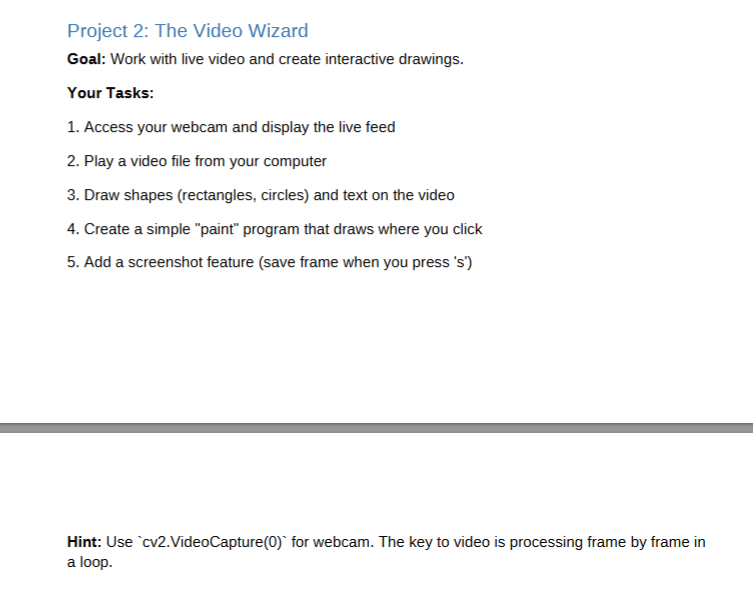

In [5]:
import cv2 as cv

In [6]:
#Access your webcam and display the live feed

capture = cv.VideoCapture(0) # 0 bilgisayar kamerası 1 yazmak extra kamera demektir

height = capture.get(cv.CAP_PROP_FRAME_HEIGHT)
width = capture.get(cv.CAP_PROP_FRAME_WIDTH)
count = capture.get(cv.CAP_PROP_FRAME_COUNT)
fps = capture.get(cv.CAP_PROP_FPS)
print(height, width, count,fps)

while True:
    ret, frame = capture.read()
    if ret is True:
        cv.imshow("video-input",frame)
        c = cv.waitKey(50)
        if c>= 49:
            index = c-49
        if c == 27: #ESC
            break
    else:
        break
cv.waitKey(1)


480.0 640.0 -1.0 30.0


-1

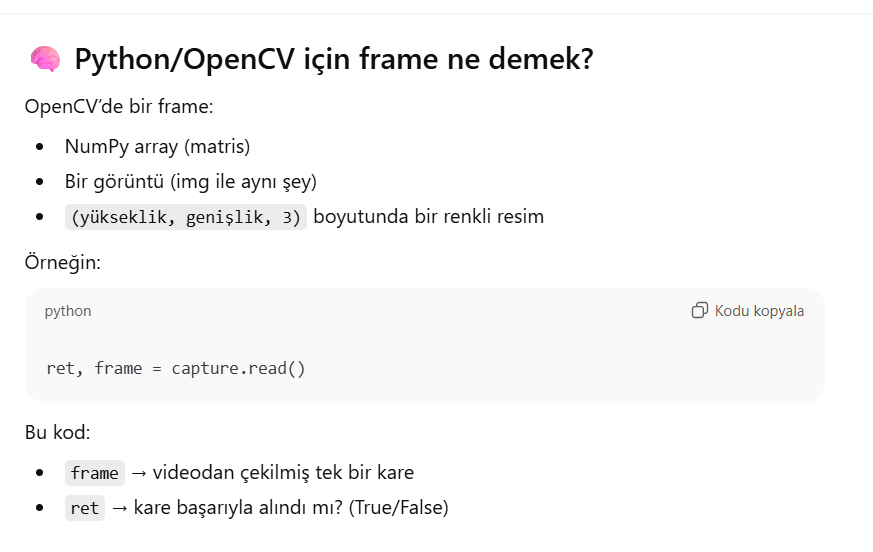

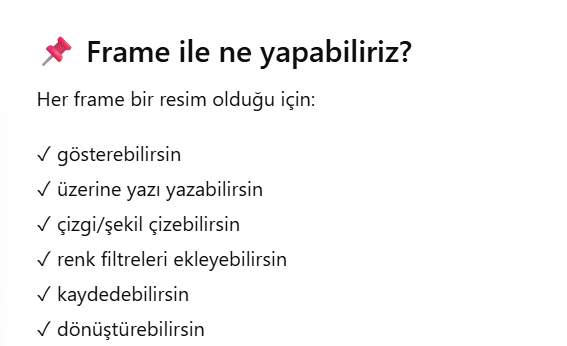

In [7]:
#Video Okuma ve Yazma

capture = cv.VideoCapture("Video_path")

#Videonun temel bilgilerini alma
height = capture.get(cv.CAP_PROP_FRAME_HEIGHT)
width = capture.get(cv.CAP_PROP_FRAME_WIDTH)
count = capture.get(cv.CAP_PROP_FRAME_COUNT)
fps = capture.get(cv.CAP_PROP_FPS)
print(height, width, count,fps)

# Yani webcam’den veya bir dosyadan gelen 
# görüntüyü yeni bir video dosyasına yazmak için kullanılır.
out = cv.VideoWriter(
    "video_dizin.avi", #kaydedilecek yeni video dosyası
    cv.VideoWriter_fourcc('D', 'I', 'V', 'X'), #codec
    15, #FPS (saniyede 15 kare)
    (int(width), int(height)), #video boyutu
    True #renkli video
)

#Videoyu döngü içinde kare kare okuma

#ret = True → kare başarıyla okundu
#ret = False → video bitti veya hata var


while True:
    ret , frame = capture.read()

    if ret is True:
        #okunan görüntüyü ekrana göster
        cv.imshow("video-input",frame)
        out.write(frame)
        #50 sn sonra çık
        c = cv.waitKey(50)
        if c == 27: #ESC
            break
    else:
        break

#Kaynakları serbest bırakmak
capture.release()
out.release()
cv.destroyAllWindows()


0.0 0.0 0.0 0.0


In [8]:
#Video üzerine şekil çizme ve yazı ekleme

capture = cv.VideoCapture(0)

while True:
    ret , frame = capture.read()
    if not ret:
        break

    #Dikgörtgen çizme
    #parametreler
    #frame -> videodan gelen tek kare. üzerinde çizim yapılacak görüntü
    # pt1 -> sol üst köşe
    # pt2 -> sağ alt köşe
    # color ->
    # thickness -> çizgi kalınlığı
    cv.rectangle(
    img=frame,
    pt1=(100, 100),
    pt2=(300, 300),
    color=(0, 255, 0),
    thickness=2
)
    
#Daire çizme cv.circle(merkez,yarıçap)
cv.circle(frame,(400,200),50,(255,0,0),3)

#Yazı Yazma
cv.putText(
    frame, # img	Üzerine yazı yazılan görüntü
    "OpencvDemo",# text	Yazı metni
    (50,50), # org	Yazının sol alt koordinatı
    cv.FONT_HERSHEY_PLAIN, # fontFace	Yazı tipi
    1, # fontScale	Yazı büyüklüğü
    (0,0,255), # color	Yazı rengi
    2 # thickness	Yazı kalınlığı
    )

capture.release()
cv.destroyAllWindows()

In [9]:
#Task 4

drawing = False
points = [] #tıkladığım nokta koordinatlarını burda tutacağım

#Fare tıklamalarını yakalayan fonksiyon
def draw(event, x, y, flags, param):
    global points
    if event == cv.EVENT_LBUTTONDOWN:   # Sol tık
        points.append((x, y))

capture = cv.VideoCapture(0)
cv.namedWindow("Paint")
#Fare olaylarını pencereye bağlama
cv.setMouseCallback("Paint", draw) # fare tıklamalarını yakalar

while True:
    ret, frame = capture.read()
    if not ret:
        break

    # Tıklanan her noktaya küçük bir daire çiz
    for p in points:
        cv.circle(frame, p, 5, (0, 0, 255), -1)

    cv.imshow("Paint", frame)

    if cv.waitKey(1) & 0xFF == 27:  # ESC
        break

capture.release()
cv.destroyAllWindows()


In [10]:
import cv2 as cv

In [12]:
#Task 5 : Ekran görüntüsü alma

capture = cv.VideoCapture(0)
count = 0

while True:
    ret , frame = capture.read()
    if not ret:
        break

    cv.imshow("Screenshot",frame)

    key = cv.waitKey(1) & 0xFF

    if key == ord('s'): #ord() bir karakterin ASCII değerini döndürür
        cv.imwrite(f"screenshot_{count}.jpg",frame)
        print("screenshot_{} kaydedildi".format(count))
        count +=1

    if key == 27: #ESC
        break

capture.release()
cv.destroyAllWindows()